# Generalized Additive Models

This module has helper functions to help
compute the degrees of freedom of a GAM and to create a partial dependence plot of a
fitted `pygam` model.

In [21]:
import numpy as np
from pygam import LinearGAM, s
from ISLP.pygam import (plot, 
                        approx_lam, 
                        degrees_of_freedom)

## Make a toy dataset

We create a simple dataset with 5 features.
We'll have a cubic effect for our first feature, and linear for the remaining 4 features.

By construction, all the "action" in our GAM will be in the first feature. This will have our 
scatter plot look like the partial residuals from our fit. Usually, the scatter plot will not
look so nice on a partial dependence plot. One should use partial residuals instead. We take this liberty
here while demonstrating the `plot` function.

In [46]:
rng = np.random.default_rng(1)
N = 100
X = rng.normal(size=(N, 3))
Y = X[:,0] + 0.3 * X[:,0]**3 + rng.normal(size=N)

## Create a GAM

Let's start of fitting a GAM with a relatively small amount of smoothing.

In [54]:
terms = [s(f, lam=0.01) for f in range(3)]
gam = LinearGAM(terms[0] + 
                terms[1] + 
                terms[2])
gam.fit(X, Y)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + s(2) + intercept, 
   tol=0.0001, verbose=False)

## Plot the partial dependence plot for first feature

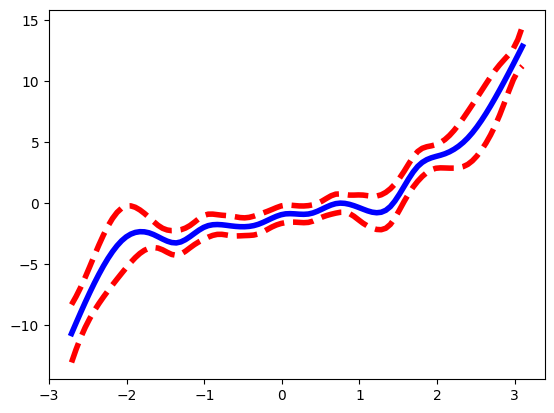

In [55]:
ax = plot(gam, 0)

Including a scatter plot of 

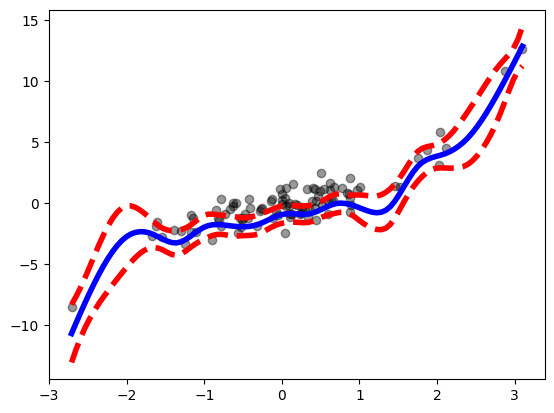

In [56]:
ax.scatter(X[:,0], 
           Y - Y.mean(),
          facecolor='k',
          alpha=0.4)
ax.get_figure()

Let's take a look at (approximately) how many degrees of freedom we've used:

In [57]:
[degrees_of_freedom(X,
                   terms[i]) for i in range(X.shape[1])]

[14.217770998911778, 14.464699512943346, 16.489388425772507]

## Fixing degrees of freedom

Suppose we want to use 5 degrees of freedom for each feature. 
We compute a value of `lam` for each that fixes the degrees of freedom at 5.

In [58]:
lam_vals = [approx_lam(X,
                       terms[i],
                       df=5) for i in range(X.shape[1])]
lam_vals

[array([63.50397852]), array([26.02829505]), array([22.44251121])]

### Create a new GAM with the correctly fixed terms

In [59]:
fixed_terms = [s(f, lam=l) for 
               f, l in zip(range(3), lam_vals)]
fixed_gam = LinearGAM(fixed_terms[0] + 
                      fixed_terms[1] + 
                      fixed_terms[2])
fixed_gam.fit(X, Y)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + s(2) + intercept, 
   tol=0.0001, verbose=False)

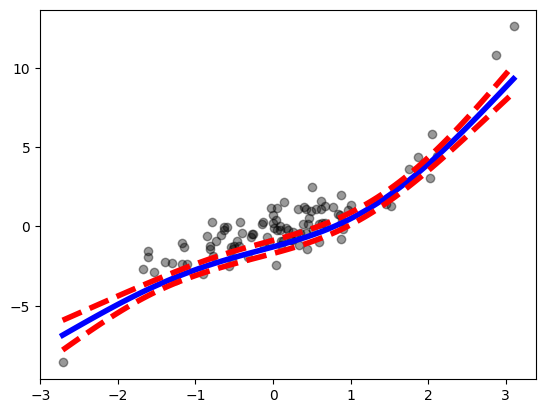

In [60]:
ax = plot(fixed_gam, 0)
ax.scatter(X[:,0], 
           Y - Y.mean(),
          facecolor='k',
          alpha=0.4);